In [2]:
import numpy as np
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_path = '_static/playback-thumbnail.png'

import librosa
import librosa.display

# We'll need IPython.display's Audio widget
from IPython.display import Audio

In [6]:
def plot_time_series(data):
    fig = plt.figure(figsize=(20, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

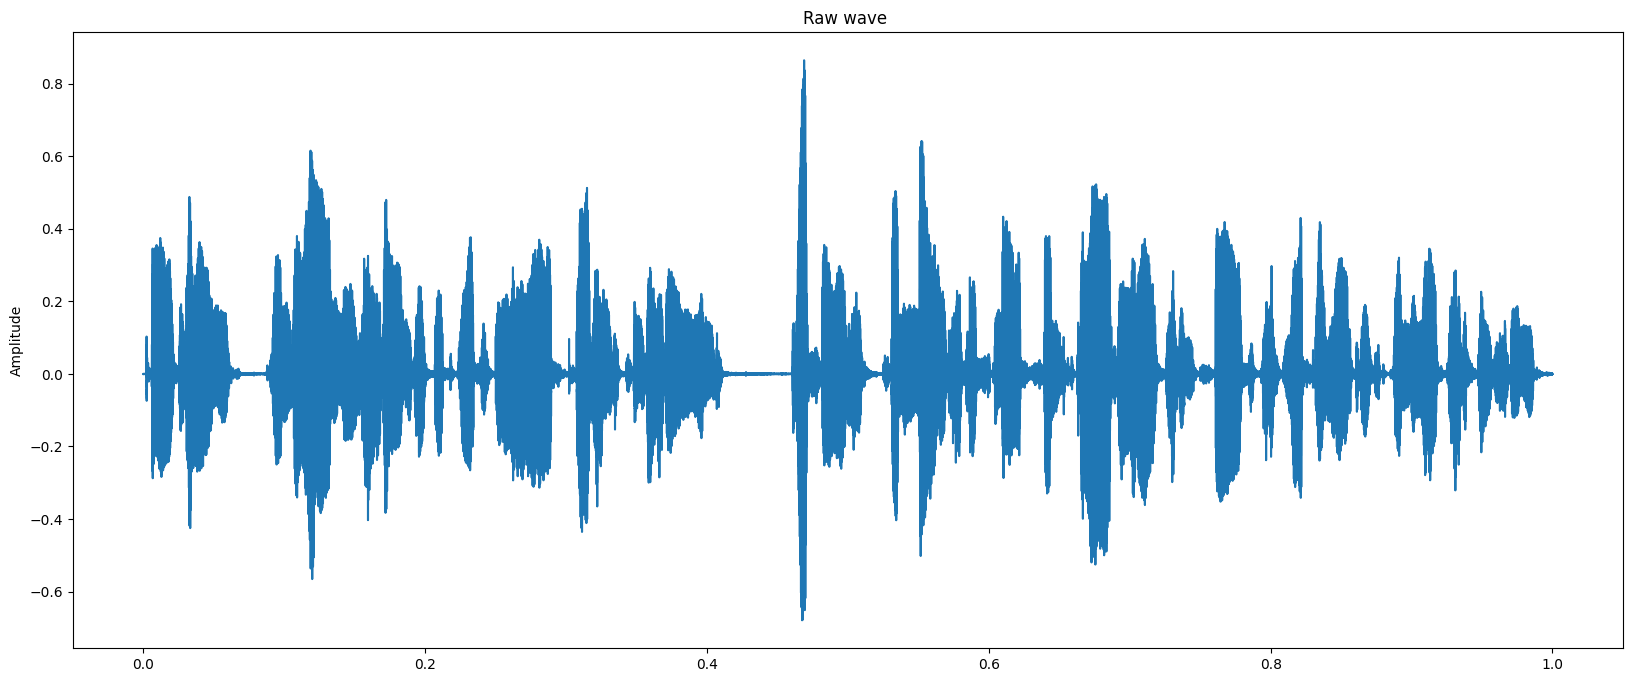

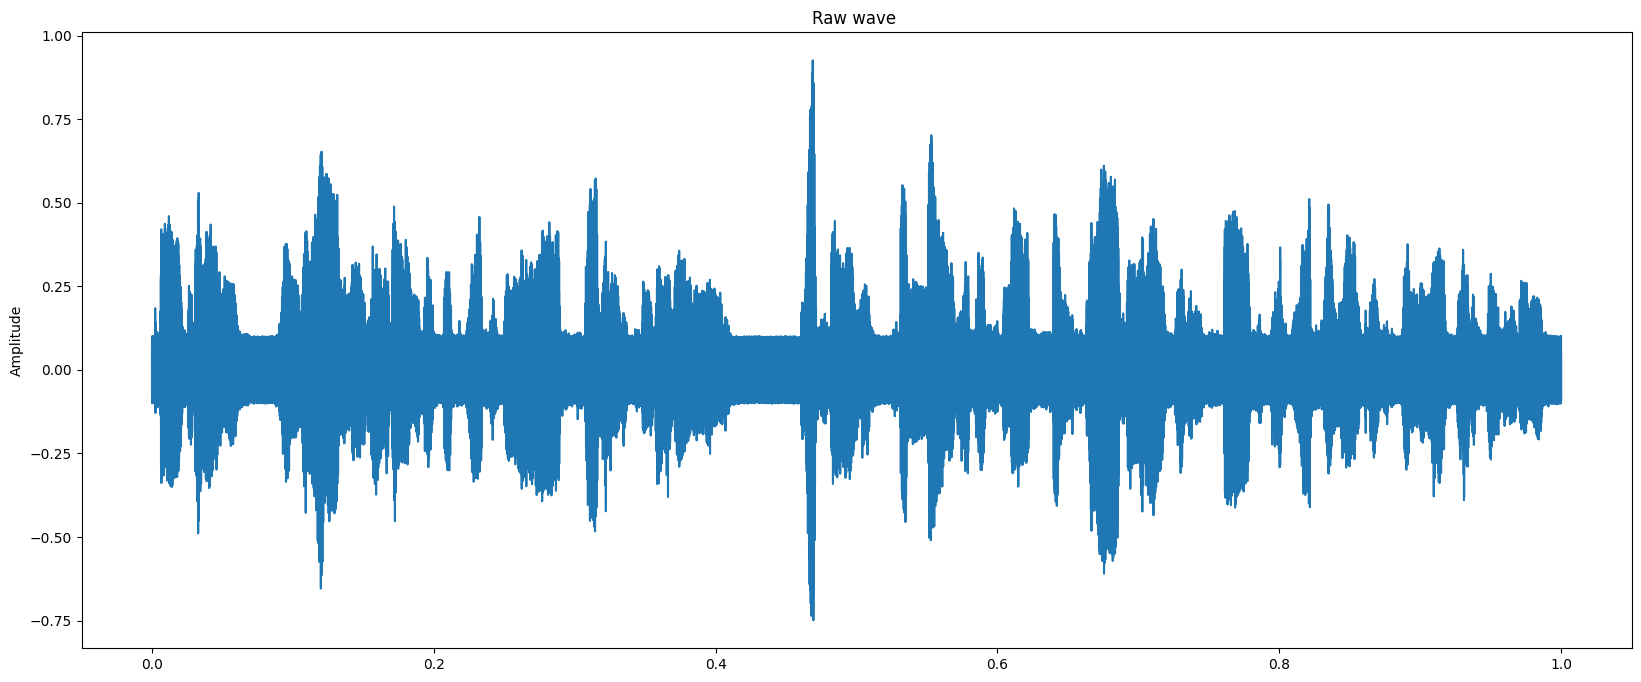

In [11]:
audio_path = "/home/rokbal/Personal/mltu/Datasets/LJSpeech-1.1/wavs/LJ001-0001.wav"
audio, sr = librosa.load(audio_path)

plot_time_series(audio)

# frame_length = 256
# frame_step = 160
# fft_length = 384

# # Compute the Short Time Fourier Transform (STFT) of the audio data and store it in the variable 'spectrogram'
# # The STFT is computed with a hop length of 'frame_step' samples, a window length of 'frame_length' samples, and 'fft_length' FFT components.
# # The resulting spectrogram is also transposed for convenience
# spectrogram = librosa.stft(audio, hop_length=frame_step, win_length=frame_length, n_fft=fft_length).T

# # Take the absolute value of the spectrogram to obtain the magnitude spectrum
# spectrogram = np.abs(spectrogram)

# # Take the square root of the magnitude spectrum to obtain the log spectrogram
# spectrogram = np.power(spectrogram, 0.5)

# # Normalize the spectrogram by subtracting the mean and dividing by the standard deviation.
# # A small value of 1e-10 is added to the denominator to prevent division by zero.
# spectrogram = (spectrogram - np.mean(spectrogram)) / (np.std(spectrogram) + 1e-10)

Audio(data=audio, rate=sr)

# wn = np.random.randn(len(audio))
wn = np.random.uniform(-1, 1, len(audio))
audio_noisy = audio + 0.1*wn
plot_time_series(audio_noisy)
Audio(data=audio_noisy, rate=sr)

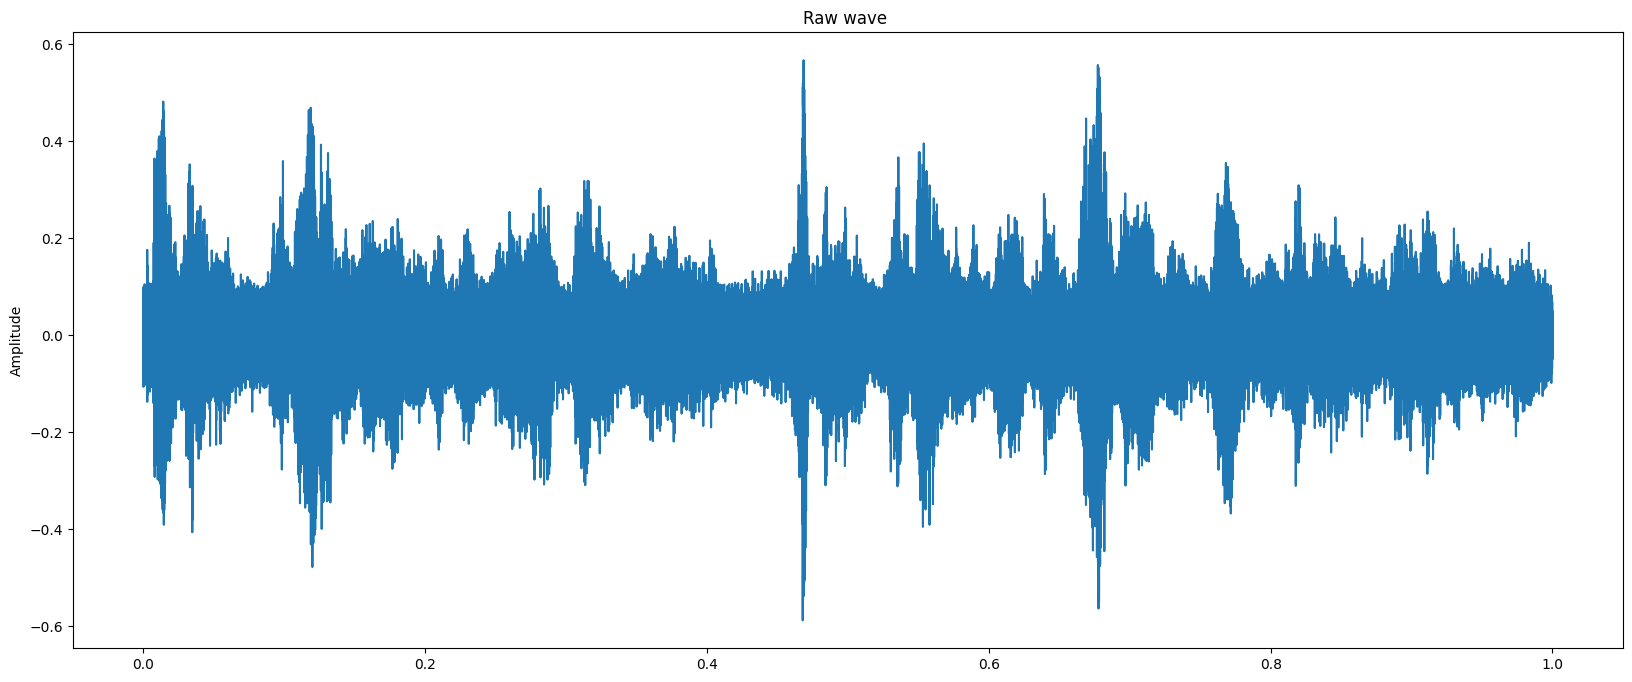

In [16]:
# Shifting the sound
stretch_audio = librosa.effects.time_stretch(audio_noisy, rate=1.2)
plot_time_series(stretch_audio)
Audio(data=stretch_audio, rate=sr)

In [36]:
shift_audio = librosa.effects.pitch_shift(audio, n_steps=5)
plot_time_series(shift_audio)
Audio(data=shift_audio, rate=sr)

TypeError: pitch_shift() missing 1 required keyword-only argument: 'sr'

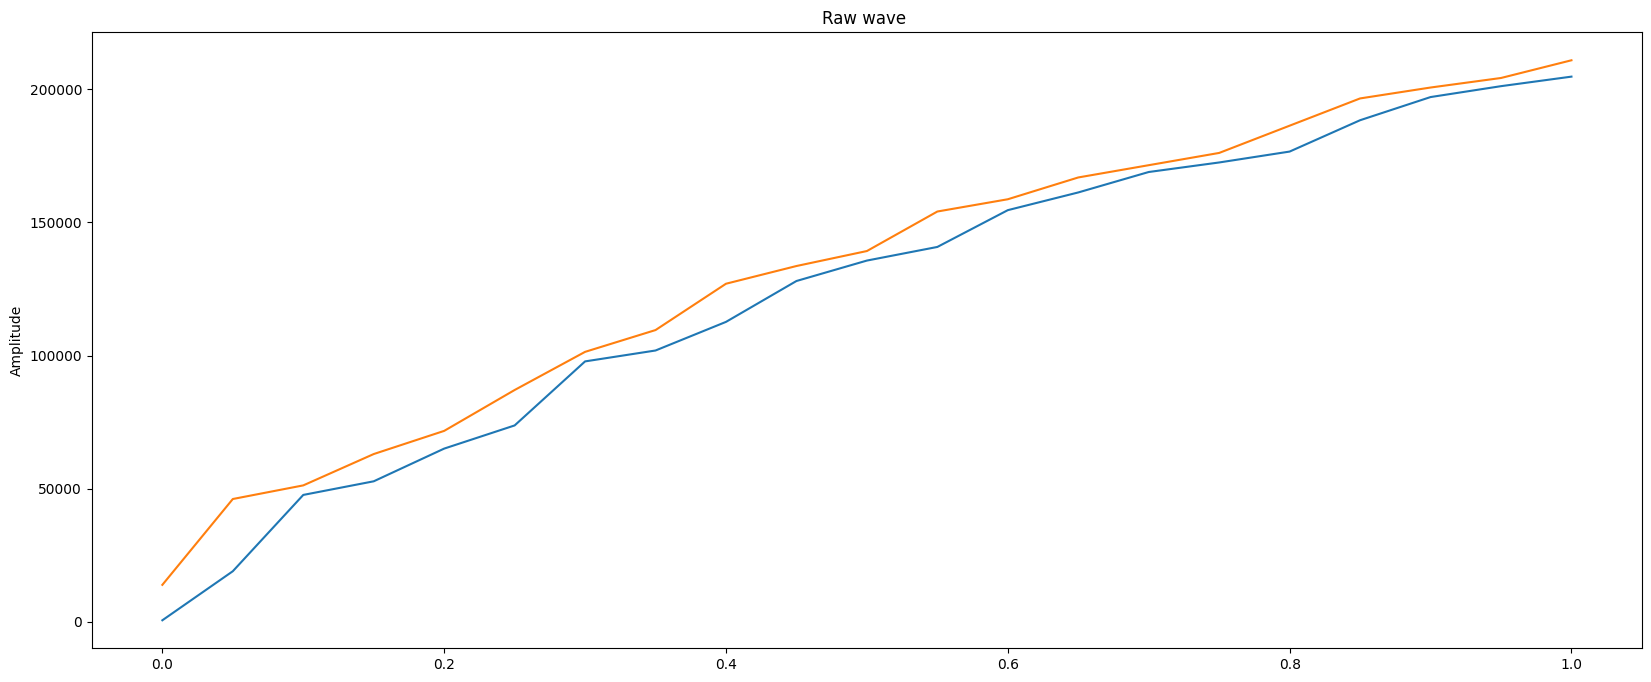

In [35]:
# trim_audio = librosa.effects.split(audio, top_db=20)
# plot_time_series(trim_audio)
# Audio(data=trim_audio, rate=sr)

In [3]:
import librosa
from mltu.preprocessors import AudioReader
from mltu.transformers import AudioToSpectrogram
from mltu.augmentors import RandomAudioNoise, RandomAudioPitchShift, RandomAudioTimeStretch
from IPython.display import Audio

reader = AudioReader()

randomAudioNoise = RandomAudioNoise(random_chance=0.5)
randomAudioShift = RandomAudioPitchShift(random_chance=0.5)
randomAudioTimeStretch = RandomAudioTimeStretch(random_chance=0.5)

audioToSpectrogram = AudioToSpectrogram()

audio_path = "/home/rokbal/Personal/mltu/Datasets/LJSpeech-1.1/wavs/LJ001-0001.wav"

audio, _ = reader(audio_path, None)

audio_numpy = audio.numpy()
mel_13=librosa.feature.mfcc(y=audio_numpy, n_mfcc=13)

augmented_audio, _ = randomAudioNoise(audio, None)
augmented_audio, _ = randomAudioShift(augmented_audio, None)
augmented_audio, _ = randomAudioTimeStretch(augmented_audio, None)

spectrogram, _ = audioToSpectrogram(augmented_audio, None)

# plot_time_series(audio)
Audio(data=augmented_audio.numpy(), rate=augmented_audio.sample_rate)

# https://www.openslr.org/12
# https://github.com/iver56/audiomentations
# https://gist.github.com/stevemclaugh/80f192130852353ad53e6d8b6b275983
# https://colab.research.google.com/github/patrickvonplaten/notebooks/blob/master/Fine_Tune_XLS_R_on_Common_Voice.ipynb#scrollTo=kAR0-2KLkopp
# https://huggingface.co/facebook/wav2vec2-xls-r-300m
# https://huggingface.co/arijitx/wav2vec2-xls-r-300m-bengali
# https://medium.com/analytics-vidhya/how-to-generate-mfcc-from-audio-ml-for-lazy-2021-42c2fdfa208
# https://towardsdatascience.com/audio-deep-learning-made-simple-automatic-speech-recognition-asr-how-it-works-716cfce4c706